<a href="https://colab.research.google.com/github/Soman-Awan/Unilever_Prediction/blob/main/Trend_Prediction_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#Setting Whitegrid as white
%matplotlib inline
sns.set_style('whitegrid')
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading xlsx FILE
df = pd.read_excel('/content/drive/My Drive/Project_Seminar/TrainDESocial.xlsx')

In [5]:
#CHECKING DATA IN TABULATED FORM
df.head()

,Keywords,Years,Months,impact_blog,impact_forum,impact_general,impact_image,impact_instagram,impact_news,impact_review,impact_twitter,impact_video,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive,full text,hashtags,media urls,country,trend,category
0,Acai,2015,9,372,604,41,0,63,647,348,261,0,0,43,16,23,19,['Leckeres zweites Frühstück @paledo_hamburg #...,"['#onthetable, #heresmyfood, #f52grams, #reals...","[""[u'https://scontent.cdninstagram.com/vp/98f5...",DE,trend,xcat
1,Acai,2015,10,230,70,97,0,348,1044,122,221,0,0,0,11,31,16,['...kennt von euch jemand Superfoods? Ist ja ...,"[nan, nan, nan, '#parf\\xfcmerie', nan, '#acai...","['[]', '[]', '[]', ""[u'http://pbs.twimg.com/me...",DE,trend,xcat
2,Acai,2015,11,608,1146,208,0,174,588,272,165,0,13,0,14,39,22,"['...bezeichnen, das unseren Körper entgiftet,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","['[]', '[]', '[]', '[]', '[]', '[]', ""[u'https...",DE,trend,xcat
3,Acai,2015,12,423,395,33,0,151,267,23,328,0,2,18,11,21,14,['Pflaume-Apfel-Zimt Overnight Oats\n\nErschie...,"[nan, nan, nan, '#acai, #goji, #superfood', na...","['[]', '[]', '[]', ""[u'http://pbs.twimg.com/me...",DE,trend,xcat
4,Acai,2016,1,253,441,127,0,239,902,136,490,0,2,38,14,32,22,['Himbeer-Kokos-Kirsch Kuchen mit Acai\n\nErsc...,"[nan, nan, nan, nan, nan, nan, nan, '#heidiklu...","['[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]...",DE,trend,xcat


In [6]:
#No Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            7088 non-null   object
 1   Years               7088 non-null   int64 
 2   Months              7088 non-null   int64 
 3   impact_blog         7088 non-null   int64 
 4   impact_forum        7088 non-null   int64 
 5   impact_general      7088 non-null   int64 
 6   impact_image        7088 non-null   int64 
 7   impact_instagram    7088 non-null   int64 
 8   impact_news         7088 non-null   int64 
 9   impact_review       7088 non-null   int64 
 10  impact_twitter      7088 non-null   int64 
 11  impact_video        7088 non-null   int64 
 12  twitter retweets    7088 non-null   int64 
 13  instagram likes     7088 non-null   int64 
 14  sentiment_negative  7088 non-null   int64 
 15  sentiment_neutral   7088 non-null   int64 
 16  sentiment_positive  7088

In [7]:
#No Missing value
GMM = df

In [8]:
GMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            7088 non-null   object
 1   Years               7088 non-null   int64 
 2   Months              7088 non-null   int64 
 3   impact_blog         7088 non-null   int64 
 4   impact_forum        7088 non-null   int64 
 5   impact_general      7088 non-null   int64 
 6   impact_image        7088 non-null   int64 
 7   impact_instagram    7088 non-null   int64 
 8   impact_news         7088 non-null   int64 
 9   impact_review       7088 non-null   int64 
 10  impact_twitter      7088 non-null   int64 
 11  impact_video        7088 non-null   int64 
 12  twitter retweets    7088 non-null   int64 
 13  instagram likes     7088 non-null   int64 
 14  sentiment_negative  7088 non-null   int64 
 15  sentiment_neutral   7088 non-null   int64 
 16  sentiment_positive  7088

In [9]:
# Drop the 'full text', 'hashtags' and 'media urls' columns
GMM.drop(['full text', 'hashtags', 'media urls'], axis='columns', inplace=True)
GMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            7088 non-null   object
 1   Years               7088 non-null   int64 
 2   Months              7088 non-null   int64 
 3   impact_blog         7088 non-null   int64 
 4   impact_forum        7088 non-null   int64 
 5   impact_general      7088 non-null   int64 
 6   impact_image        7088 non-null   int64 
 7   impact_instagram    7088 non-null   int64 
 8   impact_news         7088 non-null   int64 
 9   impact_review       7088 non-null   int64 
 10  impact_twitter      7088 non-null   int64 
 11  impact_video        7088 non-null   int64 
 12  twitter retweets    7088 non-null   int64 
 13  instagram likes     7088 non-null   int64 
 14  sentiment_negative  7088 non-null   int64 
 15  sentiment_neutral   7088 non-null   int64 
 16  sentiment_positive  7088

In [10]:
# converting to binary data with column trend
GMM1 = pd.get_dummies(GMM, columns=['trend'])
GMM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            7088 non-null   object
 1   Years               7088 non-null   int64 
 2   Months              7088 non-null   int64 
 3   impact_blog         7088 non-null   int64 
 4   impact_forum        7088 non-null   int64 
 5   impact_general      7088 non-null   int64 
 6   impact_image        7088 non-null   int64 
 7   impact_instagram    7088 non-null   int64 
 8   impact_news         7088 non-null   int64 
 9   impact_review       7088 non-null   int64 
 10  impact_twitter      7088 non-null   int64 
 11  impact_video        7088 non-null   int64 
 12  twitter retweets    7088 non-null   int64 
 13  instagram likes     7088 non-null   int64 
 14  sentiment_negative  7088 non-null   int64 
 15  sentiment_neutral   7088 non-null   int64 
 16  sentiment_positive  7088

In [11]:
GMM2 = GMM1.rename(columns = {'trend_trend': 'trend', 'trend_nontrend': 'nontrend'}, inplace = False)
GMM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            7088 non-null   object
 1   Years               7088 non-null   int64 
 2   Months              7088 non-null   int64 
 3   impact_blog         7088 non-null   int64 
 4   impact_forum        7088 non-null   int64 
 5   impact_general      7088 non-null   int64 
 6   impact_image        7088 non-null   int64 
 7   impact_instagram    7088 non-null   int64 
 8   impact_news         7088 non-null   int64 
 9   impact_review       7088 non-null   int64 
 10  impact_twitter      7088 non-null   int64 
 11  impact_video        7088 non-null   int64 
 12  twitter retweets    7088 non-null   int64 
 13  instagram likes     7088 non-null   int64 
 14  sentiment_negative  7088 non-null   int64 
 15  sentiment_neutral   7088 non-null   int64 
 16  sentiment_positive  7088

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


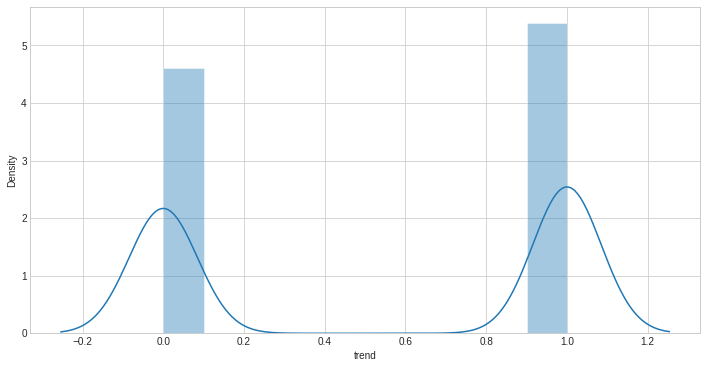

In [12]:
#Checking Distribution for all the dependent variable
sns.distplot(GMM2['trend'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


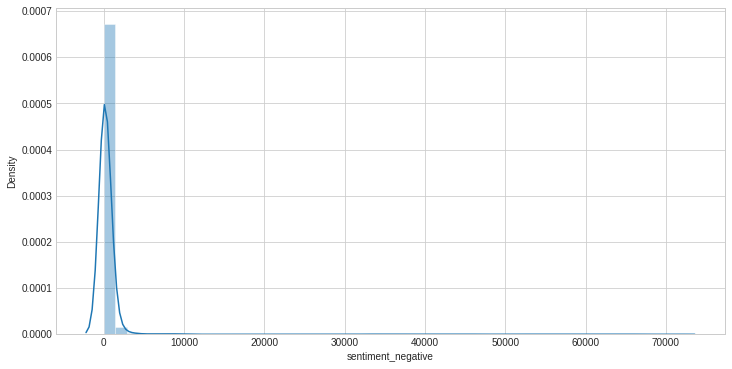

In [13]:
#Checking Distribution for some other variable 
sns.distplot(GMM2['sentiment_negative'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


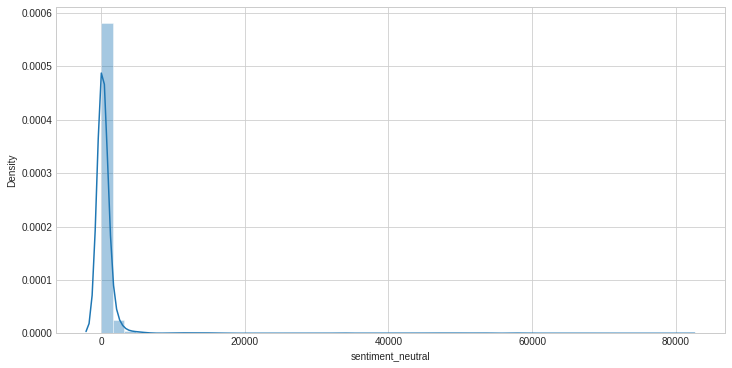

In [14]:
#Checking Distribution for some other variable
sns.distplot(GMM2['sentiment_neutral'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


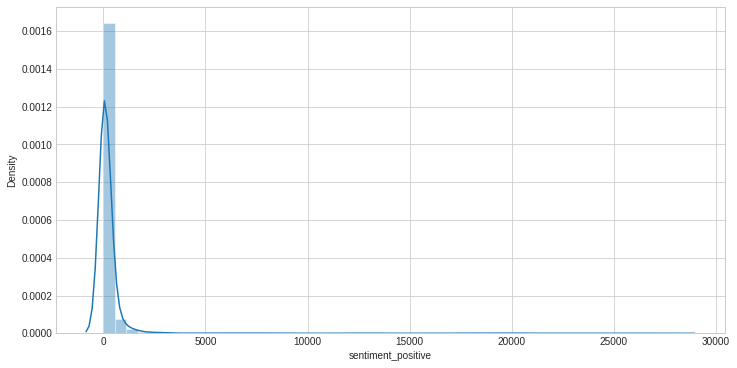

In [15]:
#Checking Distribution for some other variable 
sns.distplot(GMM2['sentiment_positive'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


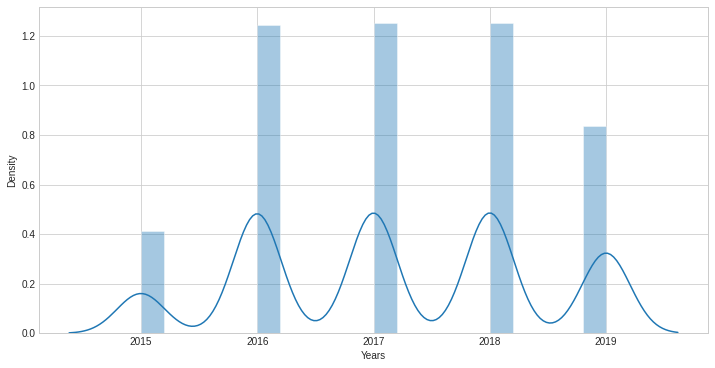

In [16]:
#Checking Distribution for some other variable 
sns.distplot(GMM2['Years'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


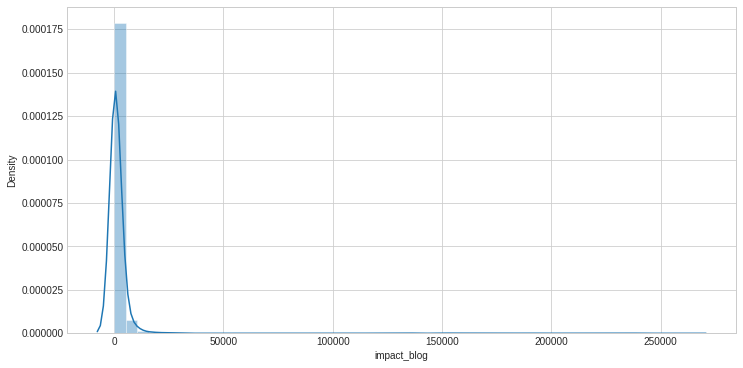

In [17]:
#Checking Distribution for some other variable 
sns.distplot(GMM2['impact_blog'])

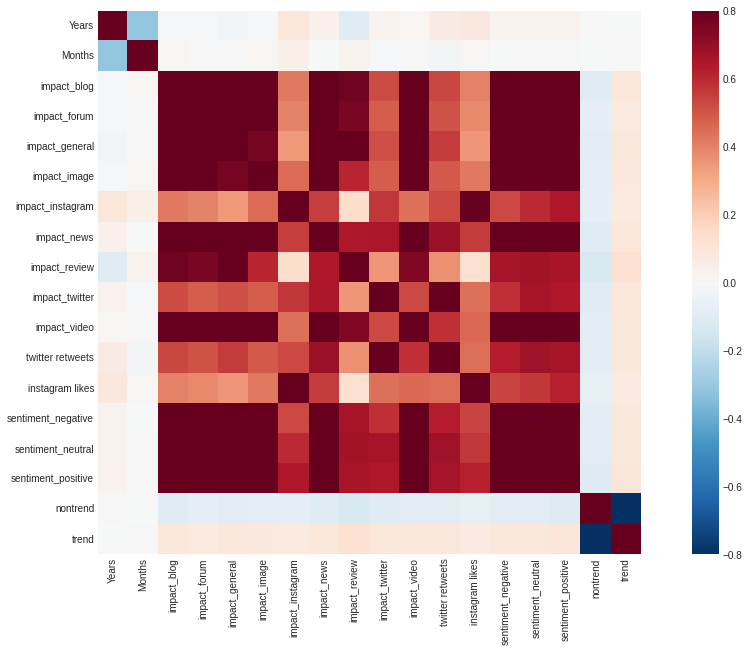

In [18]:
#correlation matrix for variables
corrmat = GMM2.corr()
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrmat,vmin=-.8, vmax=.8, square=True, cmap='RdBu_r')

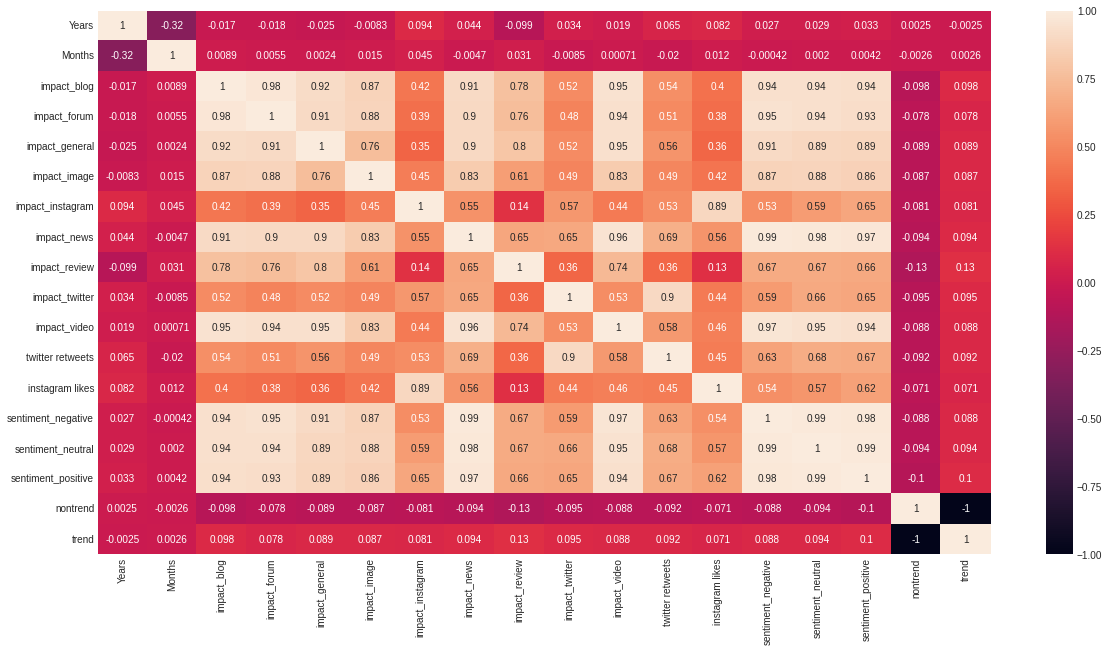

In [19]:
# Let's check the correlation between the variables 
plt.figure(figsize=(20,10)) 
sns.heatmap(GMM2.corr(), annot=True) 

In [20]:
#Creating List of Variable
my_list = list(GMM2)
print (my_list)

['Keywords', 'Years', 'Months', 'impact_blog', 'impact_forum', 'impact_general', 'impact_image', 'impact_instagram', 'impact_news', 'impact_review', 'impact_twitter', 'impact_video', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive', 'country', 'category', 'nontrend', 'trend']


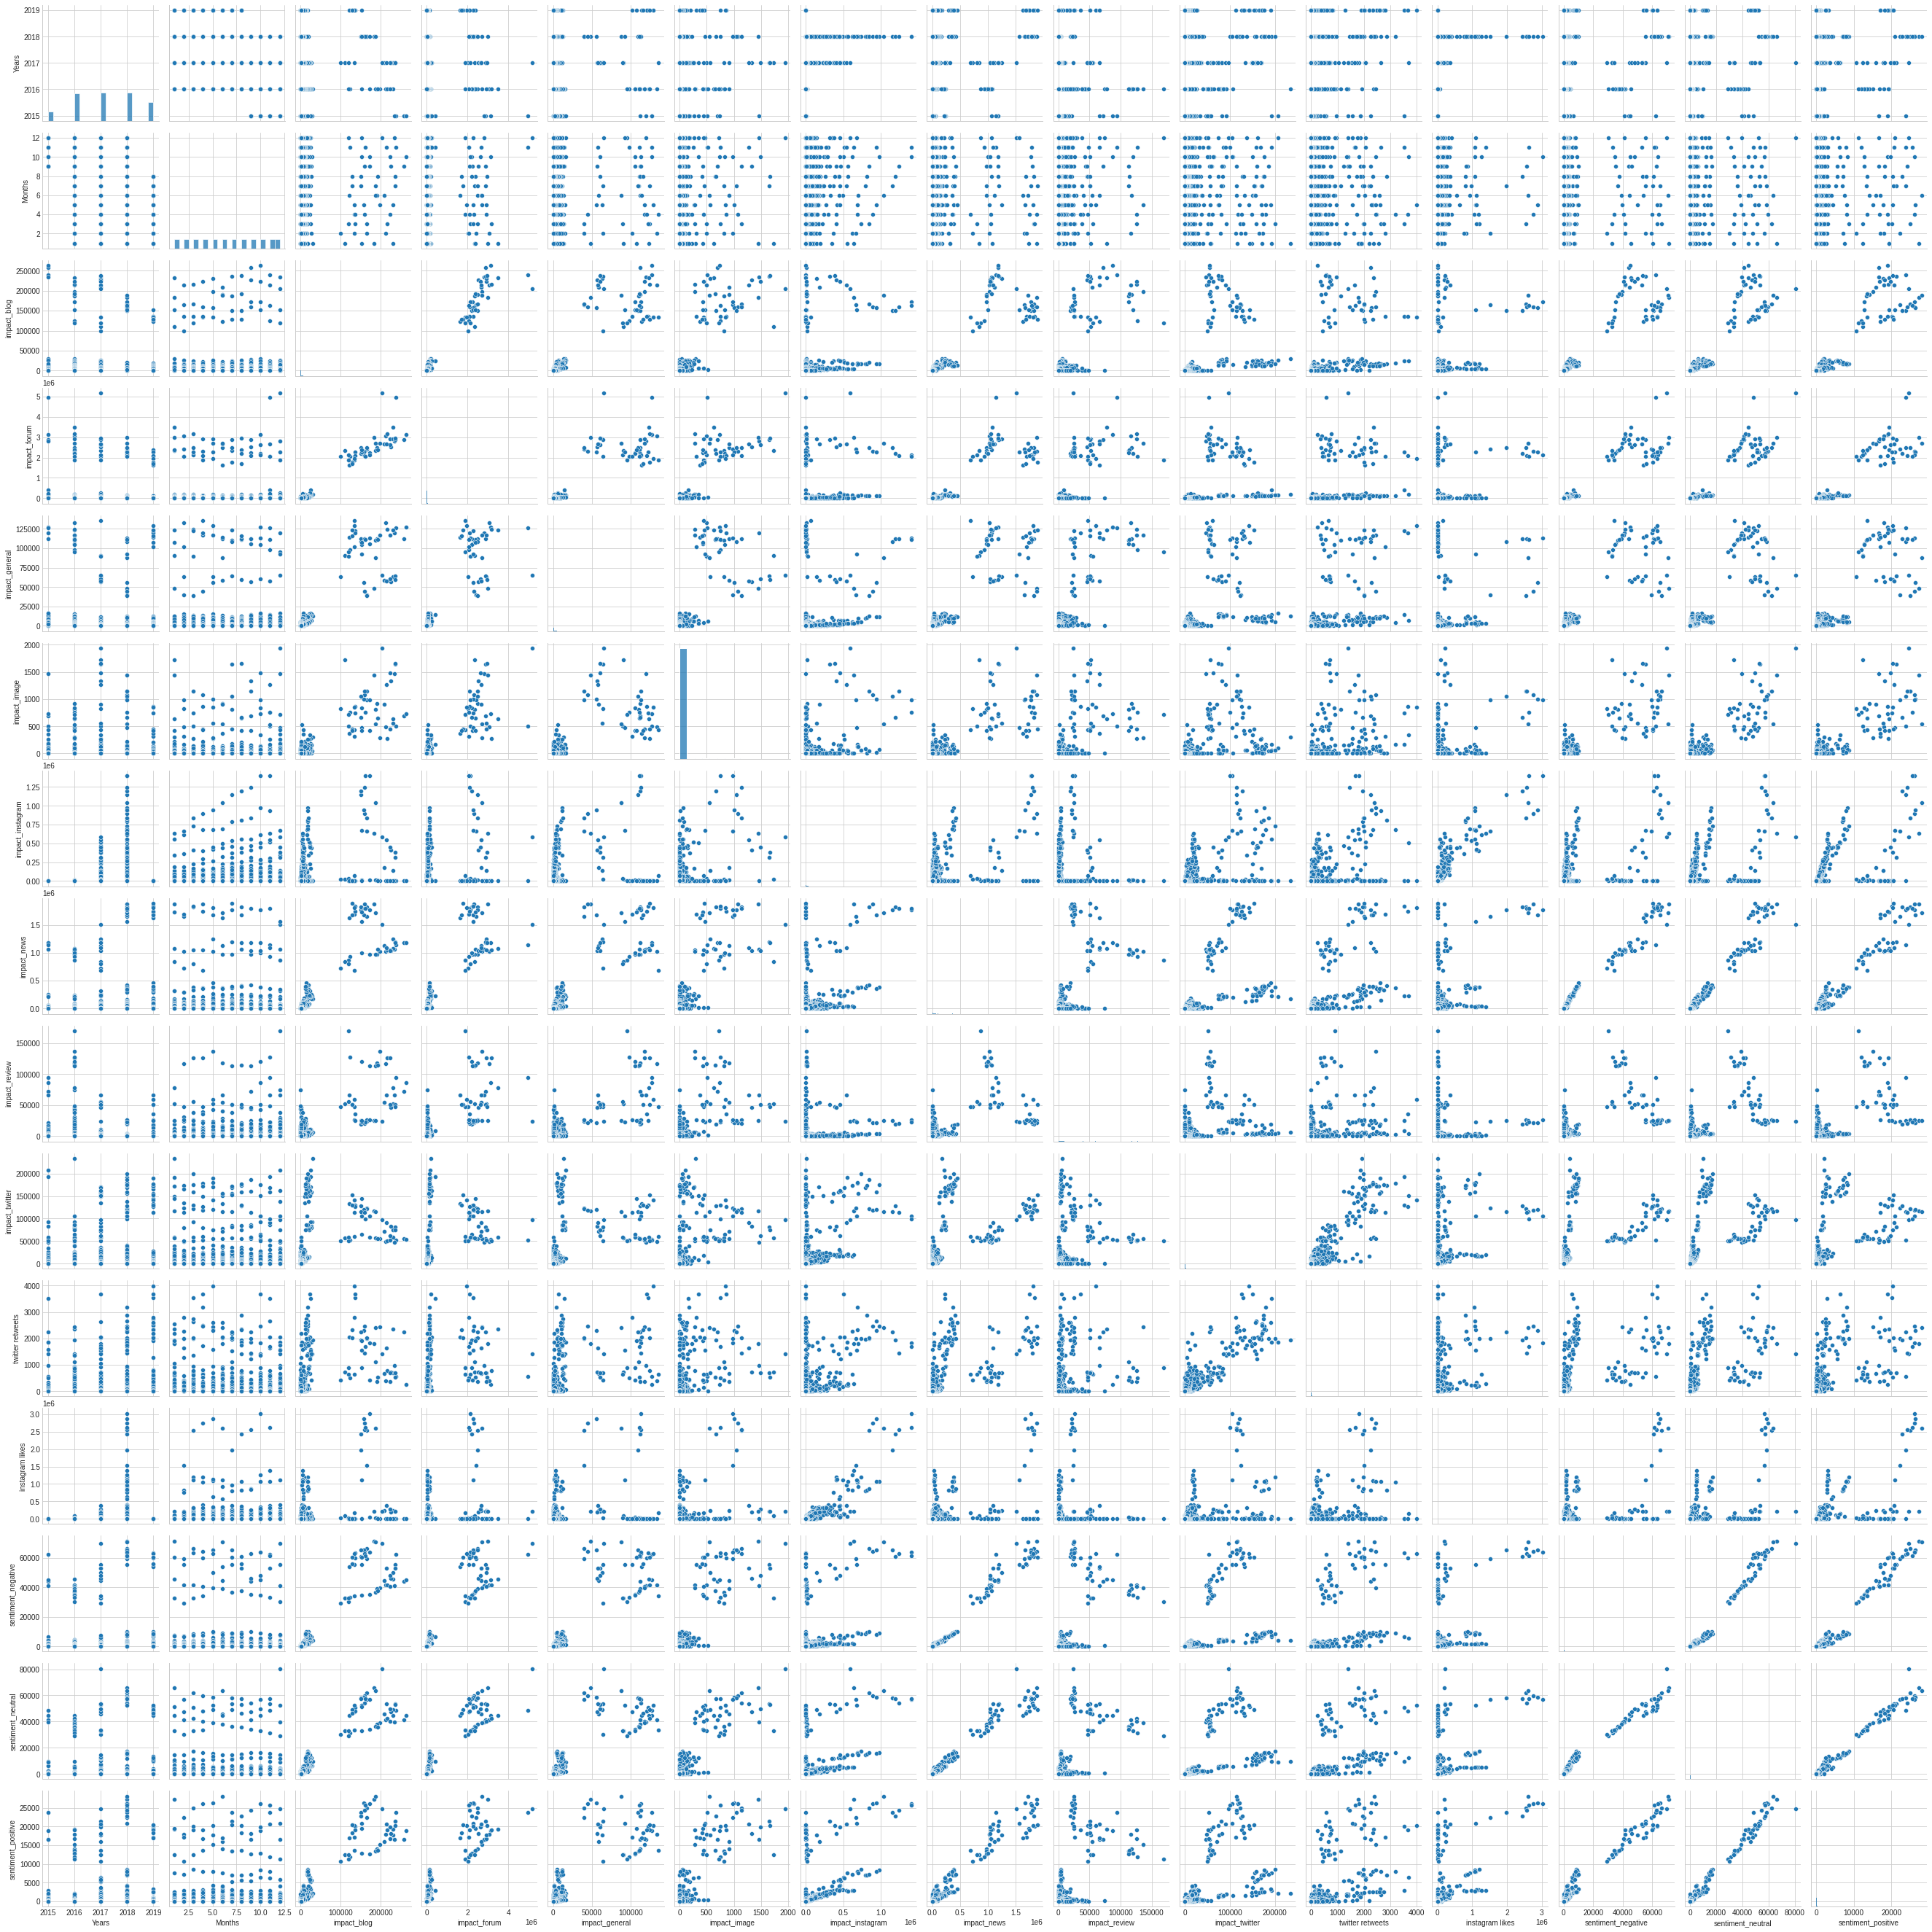

In [21]:
#scatter plots
cols = ['Years', 'Months', 'impact_blog', 'impact_forum', 'impact_general', 'impact_image', 'impact_instagram', 'impact_news', 'impact_review', 'impact_twitter', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']
sns.pairplot(GMM2[cols], height = 2.5)
plt.show()

In [22]:
#check features correlated with trend
corrmat['trend'].sort_values(ascending=False)

##We can see trend is positively correlated with impact news 

trend                 1.000000
impact_review         0.127583
sentiment_positive    0.104196
impact_blog           0.097876
impact_twitter        0.094971
impact_news           0.094084
sentiment_neutral     0.093665
twitter retweets      0.091779
impact_general        0.088933
impact_video          0.087813
sentiment_negative    0.087657
impact_image          0.086684
impact_instagram      0.080759
impact_forum          0.077822
instagram likes       0.071369
Months                0.002570
Years                -0.002524
nontrend             -1.000000
Name: trend, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


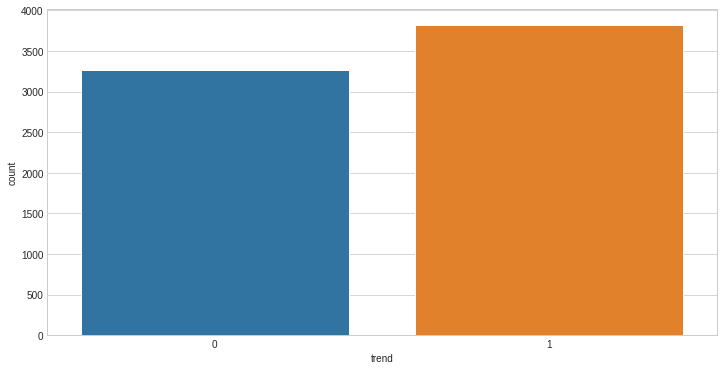

In [23]:
#Counting Trend and Non Trend Number
sns.countplot(GMM2['trend'], label = "Count")

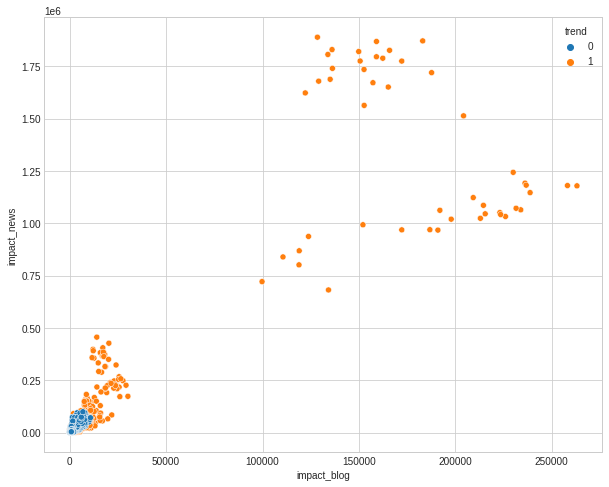

In [24]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'impact_blog', y = 'impact_news', hue = 'trend', data = GMM2)

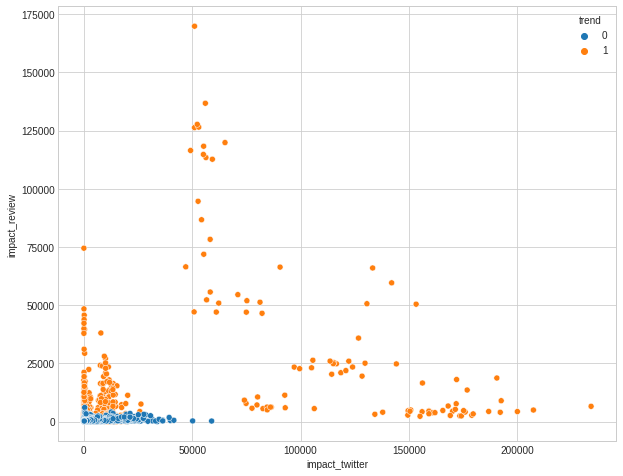

In [25]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'impact_twitter', y = 'impact_review', hue = 'trend', data = GMM2)

In [26]:
#EVERYTHING IS GOOD HERE##

In [27]:
#taking all variables for test
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

'X' shape: (7088, 16)
'y' shape: (7088,)


In [28]:
X_train = X
y_train = y

In [29]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)

In [30]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [31]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[851, 296],
       [545, 789]])

Text(0.5, 384.16, 'Predicted label')

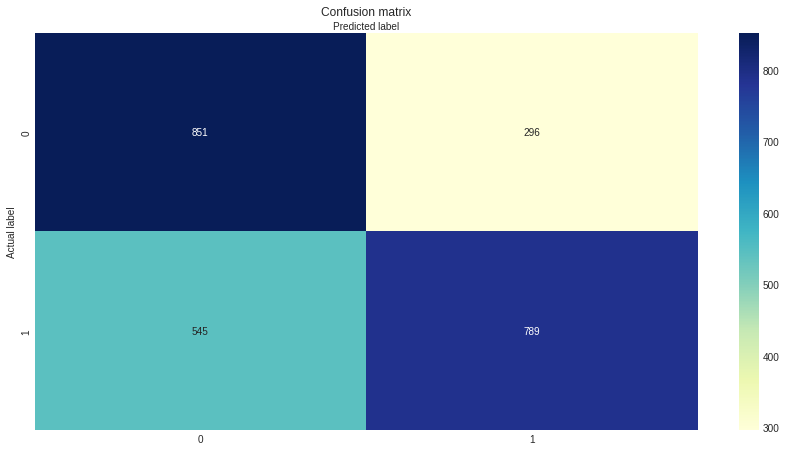

In [32]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6610237807335752
Precision: 0.727188940092166
Recall: 0.5914542728635682


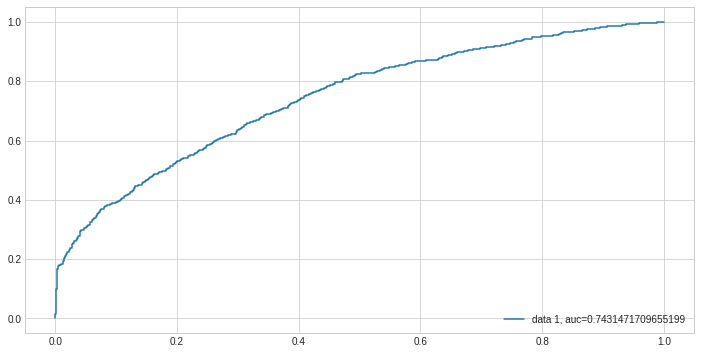

In [34]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [35]:
# Importing libraries for scaling
from sklearn.preprocessing import StandardScaler

In [36]:
GMM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            7088 non-null   object
 1   Years               7088 non-null   int64 
 2   Months              7088 non-null   int64 
 3   impact_blog         7088 non-null   int64 
 4   impact_forum        7088 non-null   int64 
 5   impact_general      7088 non-null   int64 
 6   impact_image        7088 non-null   int64 
 7   impact_instagram    7088 non-null   int64 
 8   impact_news         7088 non-null   int64 
 9   impact_review       7088 non-null   int64 
 10  impact_twitter      7088 non-null   int64 
 11  impact_video        7088 non-null   int64 
 12  twitter retweets    7088 non-null   int64 
 13  instagram likes     7088 non-null   int64 
 14  sentiment_negative  7088 non-null   int64 
 15  sentiment_neutral   7088 non-null   int64 
 16  sentiment_positive  7088

In [37]:
X

,Years,Months,impact_blog,impact_forum,impact_general,impact_image,impact_instagram,impact_news,impact_review,impact_twitter,impact_video,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive
0,2015,9,372,604,41,0,63,647,348,261,0,0,43,16,23,19
1,2015,10,230,70,97,0,348,1044,122,221,0,0,0,11,31,16
2,2015,11,608,1146,208,0,174,588,272,165,0,13,0,14,39,22
3,2015,12,423,395,33,0,151,267,23,328,0,2,18,11,21,14
4,2016,1,253,441,127,0,239,902,136,490,0,2,38,14,32,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,2019,4,1052,758,40,0,0,5166,324,315,0,0,0,92,109,37
7084,2019,5,795,4021,0,0,0,6293,260,56,0,0,0,116,337,34
7085,2019,6,884,932,22,0,0,2549,25,180,0,1,0,69,73,22
7086,2019,7,774,1183,96,0,0,3591,269,201,0,0,0,52,136,21


In [38]:
scaler = StandardScaler()
X[['impact_blog', 'impact_forum', 'impact_general', 'impact_image', 'impact_instagram', 'impact_news', 'impact_review', 'impact_twitter', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']] = scaler.fit_transform(X[['impact_blog', 'impact_forum', 'impact_general', 'impact_image', 'impact_instagram', 'impact_news', 'impact_review', 'impact_twitter', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']])

In [39]:
X.head()

,Years,Months,impact_blog,impact_forum,impact_general,impact_image,impact_instagram,impact_news,impact_review,impact_twitter,impact_video,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive
0,2015,9,-0.134858,-0.116408,-0.163137,-0.120948,-0.200299,-0.163876,-0.124542,-0.237288,0,-0.215176,-0.136124,-0.138652,-0.175962,-0.169287
1,2015,10,-0.144302,-0.118888,-0.156375,-0.120948,-0.195911,-0.160468,-0.158863,-0.239943,0,-0.215176,-0.136496,-0.139813,-0.174007,-0.171095
2,2015,11,-0.119163,-0.113891,-0.142971,-0.120948,-0.198590,-0.164382,-0.136084,-0.243658,0,-0.159264,-0.136496,-0.139116,-0.172053,-0.167480
3,2015,12,-0.131467,-0.117379,-0.164103,-0.120948,-0.198944,-0.167138,-0.173898,-0.232843,0,-0.206574,-0.136341,-0.139813,-0.176450,-0.172299
4,2016,1,-0.142773,-0.117165,-0.152752,-0.120948,-0.197589,-0.161687,-0.156737,-0.222093,0,-0.206574,-0.136167,-0.139116,-0.173763,-0.167480


In [40]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)

In [41]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=10000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [42]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[835, 312],
       [665, 669]])

Text(0.5, 384.16, 'Predicted label')

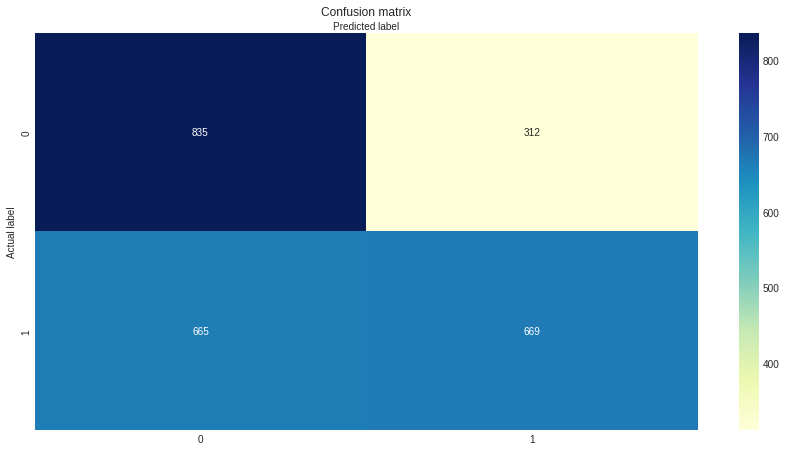

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6062071745264006
Precision: 0.6819571865443425
Recall: 0.5014992503748126


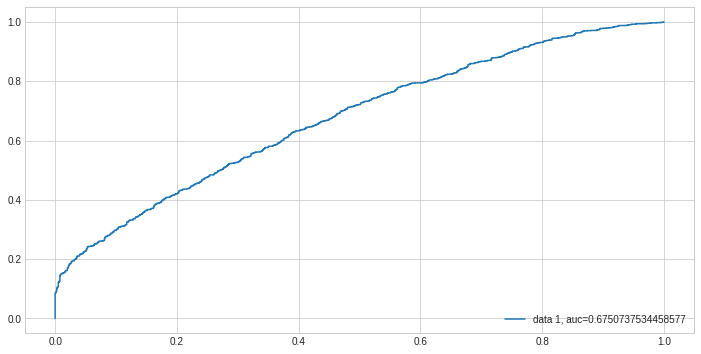

In [45]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Now Making Predictions on New Data Set

In [46]:
#Now Loading Test Data
#Reading xlsx FILE
cf = pd.read_excel('/content/drive/My Drive/Project_Seminar/Test/HoldoutDESocial.xlsx')
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1776 non-null   int64 
 1   Keywords            1776 non-null   object
 2   Years               1776 non-null   int64 
 3   Months              1776 non-null   int64 
 4   impact_blog         1776 non-null   int64 
 5   impact_forum        1776 non-null   int64 
 6   impact_general      1776 non-null   int64 
 7   impact_image        1776 non-null   int64 
 8   impact_instagram    1776 non-null   int64 
 9   impact_news         1776 non-null   int64 
 10  impact_review       1776 non-null   int64 
 11  impact_twitter      1776 non-null   int64 
 12  impact_video        1776 non-null   int64 
 13  twitter retweets    1776 non-null   int64 
 14  instagram likes     1776 non-null   int64 
 15  sentiment_negative  1776 non-null   int64 
 16  sentiment_neutral   1776

In [47]:
##We want to see the columns which has atleast 2 and above observations 
CMM = cf.dropna(axis='columns', thresh = 2)

In [48]:
# Drop the 'Unnamed: 0', 'full text', 'hashtags' and 'media urls' columns
CMM.drop(['Unnamed: 0', 'full text', 'hashtags', 'media urls'], axis='columns', inplace=True)
CMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            1776 non-null   object
 1   Years               1776 non-null   int64 
 2   Months              1776 non-null   int64 
 3   impact_blog         1776 non-null   int64 
 4   impact_forum        1776 non-null   int64 
 5   impact_general      1776 non-null   int64 
 6   impact_image        1776 non-null   int64 
 7   impact_instagram    1776 non-null   int64 
 8   impact_news         1776 non-null   int64 
 9   impact_review       1776 non-null   int64 
 10  impact_twitter      1776 non-null   int64 
 11  impact_video        1776 non-null   int64 
 12  twitter retweets    1776 non-null   int64 
 13  instagram likes     1776 non-null   int64 
 14  sentiment_negative  1776 non-null   int64 
 15  sentiment_neutral   1776 non-null   int64 
 16  sentiment_positive  1776

In [49]:
#taking all variables for test
z_test = CMM.drop(['country', 'category', 'Keywords'], axis=1)
z_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Years               1776 non-null   int64
 1   Months              1776 non-null   int64
 2   impact_blog         1776 non-null   int64
 3   impact_forum        1776 non-null   int64
 4   impact_general      1776 non-null   int64
 5   impact_image        1776 non-null   int64
 6   impact_instagram    1776 non-null   int64
 7   impact_news         1776 non-null   int64
 8   impact_review       1776 non-null   int64
 9   impact_twitter      1776 non-null   int64
 10  impact_video        1776 non-null   int64
 11  twitter retweets    1776 non-null   int64
 12  instagram likes     1776 non-null   int64
 13  sentiment_negative  1776 non-null   int64
 14  sentiment_neutral   1776 non-null   int64
 15  sentiment_positive  1776 non-null   int64
dtypes: int64(16)
memory usage: 222.1 KB


In [50]:
#taking all variables and full data for test 
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

'X' shape: (7088, 16)
'y' shape: (7088,)


In [51]:
X_train = X
y_train = y

In [52]:
#Create New Model 
logreg1 = LogisticRegression(max_iter=3000)

# fit the model with full data
logreg1.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [53]:
predictions = logreg1.predict(z_test)

In [54]:
predictions1 = pd.DataFrame(predictions, columns=['trend'])
predictions1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   trend   1776 non-null   uint8
dtypes: uint8(1)
memory usage: 1.9 KB


In [55]:
new_file = pd.concat([CMM, predictions1], axis =1)
new_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            1776 non-null   object
 1   Years               1776 non-null   int64 
 2   Months              1776 non-null   int64 
 3   impact_blog         1776 non-null   int64 
 4   impact_forum        1776 non-null   int64 
 5   impact_general      1776 non-null   int64 
 6   impact_image        1776 non-null   int64 
 7   impact_instagram    1776 non-null   int64 
 8   impact_news         1776 non-null   int64 
 9   impact_review       1776 non-null   int64 
 10  impact_twitter      1776 non-null   int64 
 11  impact_video        1776 non-null   int64 
 12  twitter retweets    1776 non-null   int64 
 13  instagram likes     1776 non-null   int64 
 14  sentiment_negative  1776 non-null   int64 
 15  sentiment_neutral   1776 non-null   int64 
 16  sentiment_positive  1776

In [56]:
from google.colab import files
new_file.to_csv('file_name_DE_LG.csv') 
files.download('file_name_DE_LG.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
#SO FAR SO GOOD HERE WITH LOGISTIC

In [58]:
pip install xgboost

In [59]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [60]:
#lets start with the default hyperparameters and hold-out mechanism for train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35)

#XGBoost
xgb_mdl = XGBClassifier().fit(X_train.values,y_train.values)
xgb_mdl

XGBClassifier()

Train Data Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2113
           1       0.81      0.83      0.82      2494

    accuracy                           0.80      4607
   macro avg       0.80      0.80      0.80      4607
weighted avg       0.80      0.80      0.80      4607

Test Data Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1150
           1       0.76      0.79      0.77      1331

    accuracy                           0.75      2481
   macro avg       0.75      0.75      0.75      2481
weighted avg       0.75      0.75      0.75      2481



[Text(90.5, 0.5, 'real values'),
 Text(0.5, 36.5, 'predicted values'),
 Text(0.5, 1.0, 'Confusion Matrix')]

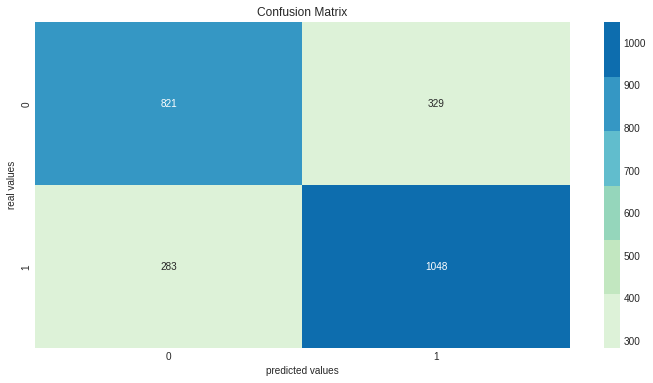

In [61]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score

#XGBoost
y_pred_train = xgb_mdl.predict(X_train.values)
y_pred = xgb_mdl.predict(X_test.values)

print("Train Data Classification Report:\n")
print(classification_report(y_train,y_pred_train))

print("Test Data Classification Report:\n")
print(classification_report(y_test,y_pred))

#generate a confusion matrix to visualise precision, recall, misclassification and false alarms
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = list(set(y)), columns = list(set(y)))

#visualise the confusion matrix in the heatmap form
plt.figure()
sns.heatmap(cm, annot = True, fmt="d",
            cmap=sns.color_palette("GnBu")).set(xlabel='predicted values', 
                                                ylabel='real values', 
                                                title = 'Confusion Matrix')

In [62]:
##Gradient Boosting Work better

In [63]:
#taking all variables for test
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

X_train = X
y_train = y

'X' shape: (7088, 16)
'y' shape: (7088,)


In [64]:
#XGBoost
xgb_mdl1 = XGBClassifier().fit(X_train,y_train)
xgb_mdl1

XGBClassifier()

In [65]:
predictions_xgb = xgb_mdl1.predict(z_test)

In [66]:
predictions_xgb1 = pd.DataFrame(predictions_xgb, columns=['trend'])
predictions_xgb1

,trend
0,1
1,1
2,1
3,0
4,1
...,...
1771,0
1772,1
1773,0
1774,0


In [67]:
new_file_xgb = pd.concat([CMM, predictions_xgb1], axis =1)
new_file_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            1776 non-null   object
 1   Years               1776 non-null   int64 
 2   Months              1776 non-null   int64 
 3   impact_blog         1776 non-null   int64 
 4   impact_forum        1776 non-null   int64 
 5   impact_general      1776 non-null   int64 
 6   impact_image        1776 non-null   int64 
 7   impact_instagram    1776 non-null   int64 
 8   impact_news         1776 non-null   int64 
 9   impact_review       1776 non-null   int64 
 10  impact_twitter      1776 non-null   int64 
 11  impact_video        1776 non-null   int64 
 12  twitter retweets    1776 non-null   int64 
 13  instagram likes     1776 non-null   int64 
 14  sentiment_negative  1776 non-null   int64 
 15  sentiment_neutral   1776 non-null   int64 
 16  sentiment_positive  1776

In [68]:
from google.colab import files
new_file_xgb.to_csv('new_file_DE_xgb.csv') 
files.download('new_file_DE_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
#Everything is good here

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from sklearn import datasets

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostRegressor

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [72]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=3000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [73]:
# Initialize individual models
clf_1 = KNeighborsClassifier()
clf_2 = LogisticRegression(max_iter=3000)
clf_3 = DecisionTreeClassifier()

In [74]:
# Create trend classifier
voting_ens = VotingClassifier(
    estimators=[('knn', clf_1), ('lr', clf_2), ('dt', clf_3)], voting='hard')

In [75]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.6946952595936795
LogisticRegression 0.6670428893905191
DecisionTreeClassifier 0.7093679458239278
VotingClassifier 0.7302483069977427


In [95]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, precision_score(y_test, y_pred))

KNeighborsClassifier 0.830168776371308
LogisticRegression 0.7433510638297872
DecisionTreeClassifier 1.0
VotingClassifier 0.9440715883668904


In [96]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, recall_score(y_test, y_pred))

KNeighborsClassifier 0.8232217573221757
LogisticRegression 0.5847280334728033
DecisionTreeClassifier 1.0
VotingClassifier 0.8828451882845189


In [97]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, f1_score(y_test, y_pred))

KNeighborsClassifier 0.8266806722689075
LogisticRegression 0.654566744730679
DecisionTreeClassifier 1.0
VotingClassifier 0.9124324324324325


In [76]:
#Now Using Ensemble Modeling

In [77]:
#taking all variables for test
X = GMM2.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM2.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

X_train = X
y_train = y

'X' shape: (7088, 16)
'y' shape: (7088,)


In [78]:
# Initialize individual models
clf_1 = KNeighborsClassifier()
clf_2 = LogisticRegression(max_iter=3000)
clf_3 = DecisionTreeClassifier()

In [79]:
# Create trend classifier
voting_ens = VotingClassifier(
    estimators=[('knn', clf_1), ('lr', clf_2), ('dt', clf_3)], voting='hard')

In [80]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(z_test)

In [81]:
#Ensembling
predictions_ensem = pd.DataFrame(y_pred, columns=['trend'])
predictions_ensem

,trend
0,1
1,1
2,1
3,0
4,1
...,...
1771,1
1772,0
1773,0
1774,1


In [82]:
new_file_ensem = pd.concat([CMM, predictions_ensem], axis =1)
new_file_ensem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            1776 non-null   object
 1   Years               1776 non-null   int64 
 2   Months              1776 non-null   int64 
 3   impact_blog         1776 non-null   int64 
 4   impact_forum        1776 non-null   int64 
 5   impact_general      1776 non-null   int64 
 6   impact_image        1776 non-null   int64 
 7   impact_instagram    1776 non-null   int64 
 8   impact_news         1776 non-null   int64 
 9   impact_review       1776 non-null   int64 
 10  impact_twitter      1776 non-null   int64 
 11  impact_video        1776 non-null   int64 
 12  twitter retweets    1776 non-null   int64 
 13  instagram likes     1776 non-null   int64 
 14  sentiment_negative  1776 non-null   int64 
 15  sentiment_neutral   1776 non-null   int64 
 16  sentiment_positive  1776

In [83]:
from google.colab import files
new_file_ensem.to_csv('new_file_DE_ensem.csv') 
files.download('new_file_DE_ensem.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
# Filter out columns of our interest in ensem
pf_ensem = new_file_ensem.loc[:, ["Keywords", "trend"]]
pf_ensem

,Keywords,trend
0,Anti-bacterial,1
1,Anti-bacterial,1
2,Anti-bacterial,1
3,Anti-bacterial,0
4,Anti-bacterial,1
...,...,...
1771,Yoghurt,1
1772,Yoghurt,0
1773,Yoghurt,0
1774,Yoghurt,1


In [85]:
# Filter out columns of our interest in xgb
pf_xgb = new_file_xgb.loc[:, ["Keywords", "trend"]]
pf_xgb

,Keywords,trend
0,Anti-bacterial,1
1,Anti-bacterial,1
2,Anti-bacterial,1
3,Anti-bacterial,0
4,Anti-bacterial,1
...,...,...
1771,Yoghurt,0
1772,Yoghurt,1
1773,Yoghurt,0
1774,Yoghurt,0


In [86]:
# Filter out columns of our interest in xgb
pf_lg = new_file.loc[:, ["Keywords", "trend"]]
pf_lg

,Keywords,trend
0,Anti-bacterial,1
1,Anti-bacterial,1
2,Anti-bacterial,1
3,Anti-bacterial,1
4,Anti-bacterial,1
...,...,...
1771,Yoghurt,1
1772,Yoghurt,0
1773,Yoghurt,1
1774,Yoghurt,1


In [87]:
result = pd.concat([pf_ensem, pf_xgb, pf_lg], axis=1)
result.columns = ['Keywords', 'ensem_trend', 'Keywords2', 'xgb_trend', 'Keywords3', 'lg_trend']
all_model = result.drop(['Keywords2', 'Keywords3'], axis=1)

In [88]:
all_model

,Keywords,ensem_trend,xgb_trend,lg_trend
0,Anti-bacterial,1,1,1
1,Anti-bacterial,1,1,1
2,Anti-bacterial,1,1,1
3,Anti-bacterial,0,0,1
4,Anti-bacterial,1,1,1
...,...,...,...,...
1771,Yoghurt,1,0,1
1772,Yoghurt,0,1,0
1773,Yoghurt,0,0,1
1774,Yoghurt,1,0,1


In [89]:
cols_to_sum = all_model.columns[ : all_model.shape[0]-0]
cols_to_sum
all_model['total_count'] = all_model[cols_to_sum].sum(axis=1)

In [90]:
# create a list of our conditions
conditions = [
    (all_model['total_count'] < 2),
    (all_model['total_count'] >= 2)
    ]
# create a list of the values we want to assign for each condition
values = ['no trend', 'trend']

# create a new column and use np.select to assign values to it using our lists as arguments
all_model['trend?'] = np.select(conditions, values)

# display updated DataFrame
all_model

,Keywords,ensem_trend,xgb_trend,lg_trend,total_count,trend?
0,Anti-bacterial,1,1,1,3,trend
1,Anti-bacterial,1,1,1,3,trend
2,Anti-bacterial,1,1,1,3,trend
3,Anti-bacterial,0,0,1,1,no trend
4,Anti-bacterial,1,1,1,3,trend
...,...,...,...,...,...,...
1771,Yoghurt,1,0,1,2,trend
1772,Yoghurt,0,1,0,1,no trend
1773,Yoghurt,0,0,1,1,no trend
1774,Yoghurt,1,0,1,2,trend


In [91]:
all_model1 = all_model.groupby(['Keywords'])['trend?'].agg(pd.Series.mode).reset_index()

In [92]:
from google.colab import files
all_model1.to_csv('all_model1.csv') 
files.download('all_model1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**That's all folks**